In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-in-india/ICMRTestingDetails.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/coronavirus-cases-in-india/Indian Coordinates.csv
/kaggle/input/coronavirus-cases-in-india/Covid cases in India.csv
/kaggle/input/coronavirus-cases-in-india/per_day_cases.xlsx
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd 

import plotly.express as px
import datetime
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import folium 
from folium import plugins

In [3]:
df1 = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv')

In [4]:
df1.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1.0,30/01/20,Kerala,1.0,0.0,0.0,0.0
1,2.0,31/01/20,Kerala,1.0,0.0,0.0,0.0
2,3.0,01/02/20,Kerala,2.0,0.0,0.0,0.0
3,4.0,02/02/20,Kerala,3.0,0.0,0.0,0.0
4,5.0,03/02/20,Kerala,3.0,0.0,0.0,0.0


In [5]:
covid= pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
covid= covid.drop(['SNo'],axis=1)

In [7]:
covid['Province/State'] = covid['Province/State'].fillna('Unknown Location',axis=0)


In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8509 entries, 0 to 8508
Data columns (total 7 columns):
ObservationDate    8509 non-null object
Province/State     8509 non-null object
Country/Region     8509 non-null object
Last Update        8509 non-null object
Confirmed          8509 non-null float64
Deaths             8509 non-null float64
Recovered          8509 non-null float64
dtypes: float64(3), object(4)
memory usage: 465.5+ KB


In [9]:
covid_confirmed = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
covid_recovered = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')
covid_deaths = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')

In [10]:
covid['ObservationDate']=pd.to_datetime(covid['ObservationDate'])
covid['Last Update']=pd.to_datetime(covid['Last Update'])

In [11]:
grouping = covid.groupby('ObservationDate')['Last Update', 'Confirmed', 'Deaths'].sum().reset_index()

In [12]:
grouping.head()

,ObservationDate,Confirmed,Deaths
0,2020-01-22,555.0,17.0
1,2020-01-23,653.0,18.0
2,2020-01-24,941.0,26.0
3,2020-01-25,1438.0,42.0
4,2020-01-26,2118.0,56.0


In [13]:
fig = px.line(grouping, x="ObservationDate", y="Confirmed", 
              title="Worldwide Confirmed Cases Over Time")
fig.show()

In [14]:
fig = px.line(grouping, x="ObservationDate", y="Deaths", title="Worldwide Deaths Over Time")
fig.show()

In [15]:
china_info = covid[covid['Country/Region'] == "Mainland China"].reset_index()
grouped_china_date = china_info.groupby('ObservationDate')['ObservationDate', 'Confirmed', 'Deaths'].sum().reset_index()

In [16]:
fig = px.line(grouped_china_date, x="ObservationDate", y="Confirmed", 
              title="Confirmed Cases Over Time (MAINLAND CHINA)")
fig.show()

In [17]:
india_info = covid[covid['Country/Region'] == "India"].reset_index()
grouped_india_date = india_info.groupby('ObservationDate')['ObservationDate', 'Confirmed', 'Deaths'].sum().reset_index()

In [18]:
fig = px.line(grouped_india_date, x="ObservationDate", y="Confirmed", 
              title="Confirmed Cases Over Time (REPUBLIC OF INDIA)")
fig.show()

In [19]:
covid19_new = covid
covid19_new['Active'] = covid19_new['Confirmed'] - (covid19_new['Deaths'] + covid19_new['Recovered'])

In [20]:
line_data = covid19_new.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
line_data = line_data.melt(id_vars="ObservationDate", value_vars=['Confirmed', 'Active', 'Recovered', 'Deaths'], var_name='Case', value_name='Count')

In [21]:
fig = px.line(line_data, x='ObservationDate', y='Count', color='Case', title='Whole World Cases over time')
fig.show()

In [22]:
china_data = covid19_new[covid19_new['Country/Region'] == 'Mainland China'].reset_index(drop=True)
china_line_data = china_data.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_line_data = china_line_data.melt(id_vars="ObservationDate", value_vars=['Confirmed', 'Active', 'Recovered', 'Deaths'], var_name='Case', value_name='Count')

In [23]:
fig = px.line(china_line_data, x='ObservationDate', y='Count',color="Case", title='China Cases over time')
fig.show()

In [24]:
italy_data = covid19_new[covid19_new['Country/Region'] == 'Italy'].reset_index(drop=True)
italy_line_data = italy_data.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
italy_line_data = italy_line_data.melt(id_vars="ObservationDate", value_vars=['Confirmed', 'Active', 'Recovered', 'Deaths'], var_name='Case', value_name='Count')

In [25]:
fig = px.line(italy_line_data, x='ObservationDate', y='Count',color="Case", title='Italy Cases over time')
fig.show()

In [26]:
fig = px.scatter(covid, y="Deaths",x = "Recovered", color="Country/Region",
                 size='Confirmed')
fig.show()

In [27]:
fig = px.scatter(covid, y="Deaths",x = "Recovered", color="Country/Region",
                 size='Confirmed',log_y=True, log_x=True)
fig.show()

In [28]:
data=df1

data['Date']=pd.to_datetime(data.Date,dayfirst=True)
data['confirmed']=data.ConfirmedForeignNational+data.ConfirmedIndianNational

In [29]:
data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed
0,1.0,2020-01-30,Kerala,1.0,0.0,0.0,0.0,1.0
1,2.0,2020-01-31,Kerala,1.0,0.0,0.0,0.0,1.0
2,3.0,2020-02-01,Kerala,2.0,0.0,0.0,0.0,2.0
3,4.0,2020-02-02,Kerala,3.0,0.0,0.0,0.0,3.0
4,5.0,2020-02-03,Kerala,3.0,0.0,0.0,0.0,3.0


In [30]:
data=data.rename(columns={'Date':'date',
                     'State/UnionTerritory':'state',
                         'Deaths':'deaths'})

In [31]:
latest = data[data['date'] == max(data['date'])].reset_index()
latest_grouped = latest.groupby('state')['confirmed', 'deaths'].sum().reset_index()
latest = data[data['date'] == max(data['date'])]
latest = latest.groupby('state')['confirmed', 'deaths'].max().reset_index()

In [32]:
latest.sort_values('confirmed')

,state,confirmed,deaths
0,Andaman and Nicobar Islands,1.0,0.0
19,Puducherry,1.0,0.0
17,Mizoram,1.0,0.0
16,Manipur,1.0,0.0
18,Odisha,2.0,0.0
6,Goa,3.0,0.0
9,Himachal Pradesh,3.0,1.0
25,Uttarakhand,5.0,0.0
2,Bihar,6.0,1.0
4,Chhattisgarh,6.0,0.0


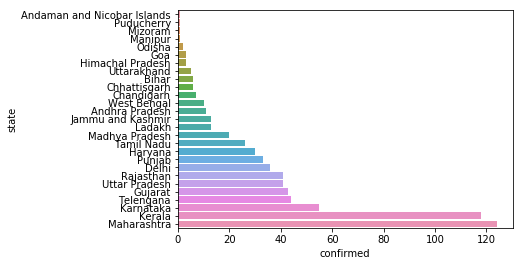

In [33]:
sns.barplot(x='confirmed', y='state',  data=latest.sort_values('confirmed')) 
plt.show()

In [34]:
df= pd.read_csv('/kaggle/input/coronavirus-cases-in-india/Covid cases in India.csv')
India_coord = pd.read_csv('/kaggle/input/coronavirus-cases-in-india/Indian Coordinates.csv')

In [35]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths
0,1,Andhra Pradesh,9,0,1,0
1,2,Bihar,4,0,0,1
2,3,Chattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,37,1,0,1


In [36]:
df.drop(['S. No.'],axis=1,inplace=True)

In [37]:
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
df['Active cases'] = df['Total cases'] - (df['Cured/Discharged/Migrated'] + df['Deaths'])
print(f'Number of Confirmed COVID 19 Cases in India', df['Total cases'].sum())
print(f'Number of Active COVID 2019 cases in India:', df['Active cases'].sum())


Number of Confirmed COVID 19 Cases in India 606
Number of Active COVID 2019 cases in India: 553


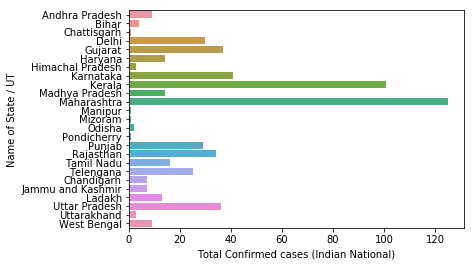

In [38]:
sns.barplot(x='Total Confirmed cases (Indian National)', y='Name of State / UT',  data=df) 
plt.show()

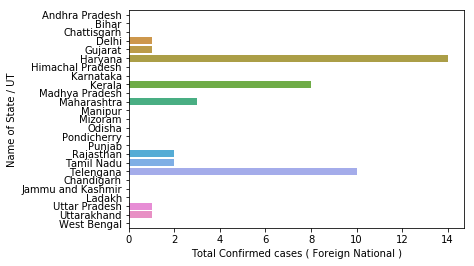

In [39]:
sns.barplot(x='Total Confirmed cases ( Foreign National )', y='Name of State / UT',  data=df) 
plt.show()

In [40]:
India_coord.drop('Unnamed: 3',axis=1,inplace=True)

In [41]:
India_coord.head(10)

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [42]:
map_data = pd.merge(India_coord,df,on='Name of State / UT')
map_data

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths,Total cases,Active cases
0,Andhra Pradesh,14.750429,78.570026,9,0,1,0,9,8
1,Chandigarh,30.719997,76.780006,7,0,0,0,7,7
2,Delhi,28.669993,77.230004,30,1,6,1,31,24
3,Haryana,28.450006,77.019991,14,14,11,0,28,17
4,Jammu and Kashmir,33.450000,76.240000,7,0,1,0,7,6
5,Karnataka,12.570381,76.919997,41,0,3,1,41,37
6,Kerala,8.900373,76.569993,101,8,4,0,109,105
7,Maharashtra,19.250232,73.160175,125,3,1,3,128,124
8,Odisha,19.820430,85.900017,2,0,0,0,2,2
9,Pondicherry,11.934994,79.830000,1,0,0,0,1,1


In [43]:
map = folium.Map(location=[18, 85], zoom_start=5)

for lat, lon, value, name in zip(map_data['Latitude'], map_data['Longitude'], map_data['Active cases'], map_data['Name of State / UT']):
    folium.CircleMarker([lat, lon],
                        radius=value*.5,
                        color='blue',
                        fill_color='blue',
                        fill_opacity=0.5 ).add_to(map)
map